In [39]:
# !pip install geopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians,asin
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster
from geopy.distance import great_circle
import matplotlib.dates as mdates
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import folium
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from geopy.distance import geodesic

In [40]:
# df = pd.read_csv('./Edwisor Cab Fare/train_cab.csv' ,nrows = 16067, parse_dates=['pickup_datetime'])

df = pd.read_csv('C:/Users/admin/Documents/Edwisor Cab Fare/train_cab.csv', nrows= 16066)

date1 = pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')
date2 = pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d UTC', errors='coerce')
    
df['pickup_datetime'] = date1.combine_first(date2)

data = df.dropna()
df.dtypes
# de1.head(10)

fare_amount          object        
pickup_datetime      datetime64[ns]
pickup_longitude     float64       
pickup_latitude      float64       
dropoff_longitude    float64       
dropoff_latitude     float64       
passenger_count      float64       
dtype: object

In [41]:
# Covert the Data types
del df['fare_amount'][1123]


# TO DO - Watch How to remove the Check if there is any special characters(Bone) inside the Fish(Column) to ensure no Frustration
df['fare_amount'] = pd.to_numeric(df['fare_amount'])
df.dtypes

fare_amount          float64       
pickup_datetime      datetime64[ns]
pickup_longitude     float64       
pickup_latitude      float64       
dropoff_longitude    float64       
dropoff_latitude     float64       
passenger_count      float64       
dtype: object

In [43]:
# df['pickup_date'] = df['pickup_datetime'].dt.date
# df['pickup_day']= df['pickup_datetime'].apply(lambda x:x.day)
# df['pickup_hour']= df['pickup_datetime'].apply(lambda x:x.hour)
# df['pickup_day_of_week']= df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
# df['pickup_month']=df['pickup_datetime'].apply(lambda x:x.month)
# df['pickup_year']=df['pickup_datetime'].apply(lambda x:x.year)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009-06-15,15.0,17.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05,5.0,16.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18,18.0,0.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012-04-21,21.0,4.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09,9.0,7.0


In [44]:
# Checking for Null Values
df[pd.isna(df)].sum()

fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
pickup_date          0.0
pickup_day           0.0
pickup_hour          0.0
dtype: float64

In [4]:
print('Old Size is %d' % len(df))
df['fare_amount'] = df['fare_amount'].where(df['fare_amount']>=0)
print('New Size is %d ' % len(df))

Old Size is 16066
New Size is 16066 


Text(0.5, 1.0, 'Histogram')

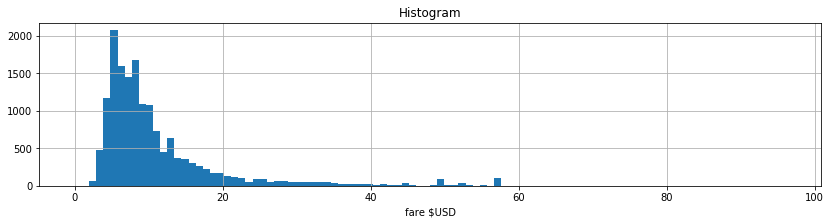

In [5]:
#Plotting a Histogram for Analyzing the Fare Amount
df[df.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title("Histogram")
#Here we observed that most of the Cab fare are between 0-20 $
# There is almost no Cab who's fare is greater than 60$

Text(0.5, 1.0, 'Distribution of Plot Fare')

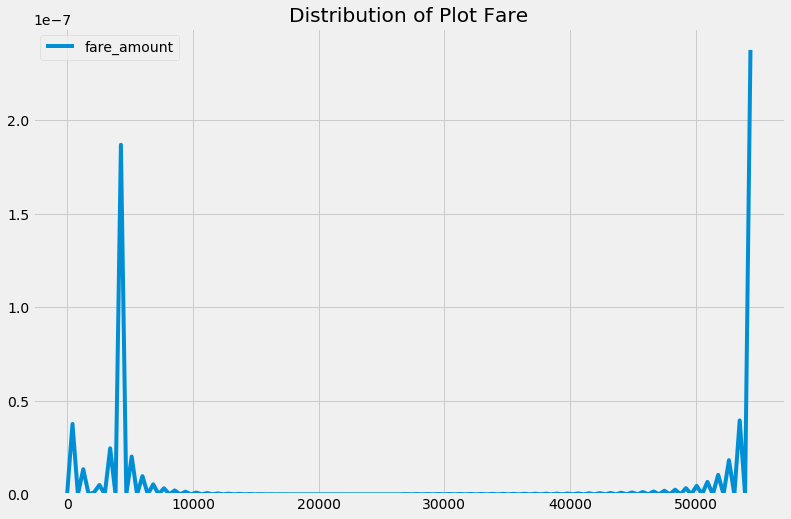

In [45]:
# Using Seaborn Plotting the same Fare or Trip amount
plt.figure(figsize=(12,8))
sns.kdeplot(df['fare_amount']).set_title("Distribution of Plot Fare")

Text(0.5, 1.0, 'Distribution of Plot Fare')

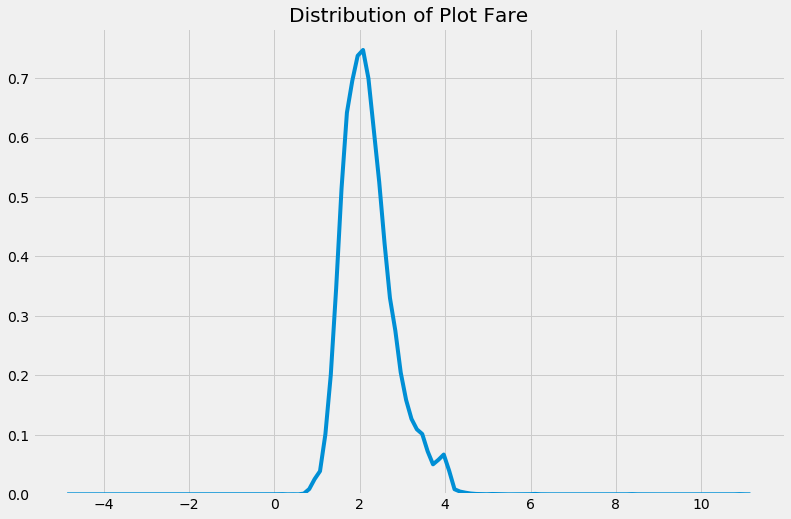

In [46]:
plt.figure(figsize=(12,8))
sns.kdeplot(np.log(df['fare_amount'].values)).set_title("Distribution of Plot Fare on Logaramatic Scale")

# Let us look at Geographical Features and Fare Amount
Distribution of Pickup and Dropoff Lat Lng



In [23]:
print(f">> Data Available since {df.fare_amount.min()}")
print(f">> Data Available upto {df.fare_amount.max()}")

>> Data Available since 0.0
>> Data Available upto 54343.0


In [69]:
# Checking for Null values
df[pd.isnull(df)].sum()

fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

# Exploratory Data Analysis

Let's Plot a HeatMap with Seaborn to see the correlation between the Variables

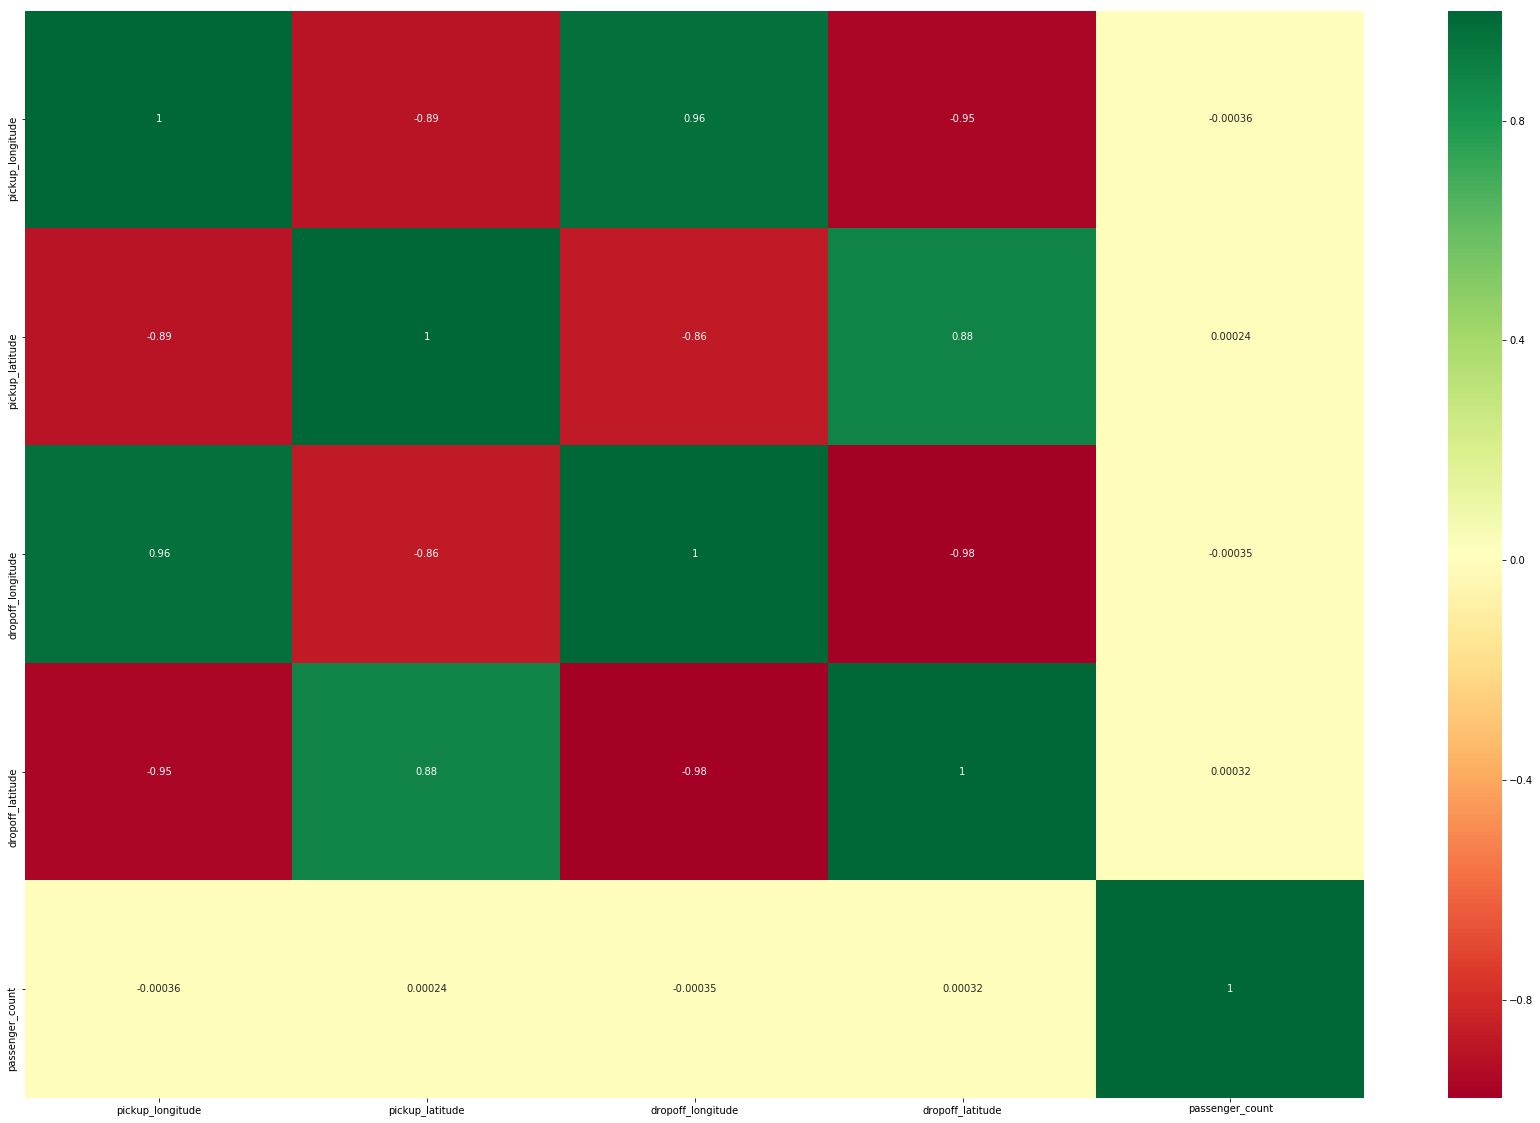

In [7]:
corrmat = df.corr()
top_corr_features = corrmat.index
top_corr_features
plt.figure(figsize=(30,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
# Checking the Distribution of the Data
df.dtypes
print("Shape of the Data",df.shape)
df1 = df['pickup_datetime']

Shape of the Data (16067, 7)


In [14]:
traintypes = {'fare_amount': 'float32',
              'pickup_datetime': 'str', 
              'pickup_longitude': 'float32',
              'pickup_latitude': 'float32',
              'dropoff_longitude': 'float32',
              'dropoff_latitude': 'float32',
              'passenger_count': 'uint8'}

cols = list(traintypes.keys())

In [20]:
df['Datetime']=pd.to_datetime('2009-06-15 17:26:21 UTC',format='%Y-%m-%d %H:%M:%S UTC')

In [22]:
df.dtypes

fare_amount                  object
pickup_datetime              object
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
Datetime             datetime64[ns]
dtype: object

In [20]:
# df['pickup_datetime']=np.datetime64(df['pickup_datetime'])
np.datetime_data(df['pickup_datetime'])


TypeError: cannot get datetime metadata from non-datetime type

In [26]:
>>> np.array(['2007-07-13', '2006-01-13', '2010-08-13'], dtype='datetime64')


array(['2007-07-13', '2006-01-13', '2010-08-13'], dtype='datetime64[D]')

In [29]:
df['pickup_datetime'] =  np.array([df['pickup_datetime']], dtype='datetime64')


G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  """Entry point for launching an IPython kernel.


ValueError: Error parsing datetime string "2009-06-15 17:26:21 UTC" at position 20

In [64]:
data['pickup_datetime'] = data['pickup_datetime'].str.slice(0, 16)
data['pickup_datetime'] = pd.datetime(data['pickup_datetime'], format='%Y-%m-%d %H:%M')


G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


TypeError: cannot convert the series to <class 'int'>

In [48]:
import datetime as dt
df['pickup_datetime_dt'] = df['pickup_datetime'].apply(lambda d: dt.datetime.strptime(d, '%Y-%m-%d %H:%M:%S UTC'))


ValueError: time data '43' does not match format '%Y-%m-%d %H:%M:%S UTC'

In [51]:
# !pip install gmplot
import gmplot 
gmap3 = gmplot.GoogleMapPlotter(30.3164945, 
                                78.03219179999999, 13) 

gmap3.scatter(df['pickup_latitude'],df['pickup_longitude'] , '# FF0000', 
                              size = 40, marker = False ) 
  
# Plot method Draw a line in 
# between given coordinates 
gmap3.plot(df['dropoff_latitude'], df['dropoff_longitude'],  
           'cornflowerblue', edge_width = 2.5) 
  
gmap3.draw( "C://Users/admin/Desktop/map13.html" ) 

In [52]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


Old Size is 16067


TypeError: '>=' not supported between instances of 'str' and 'int'